# Comparison between the magnetic field produced by a triaxial ellipsoid and a sphere

### Import the required modules and functions

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from fatiando import gridder, utils
from fatiando.gravmag import sphere
from fatiando.mesher import Sphere
import triaxial_ellipsoid
from mesher import TriaxialEllipsoid

C:\Users\Vanderlei\Documents\fatiando\fatiando\vis\mpl.py:70: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [2]:
# Set some plot parameters
from matplotlib import rcParams
rcParams['figure.dpi'] = 300.
rcParams['font.size'] = 6
rcParams['xtick.labelsize'] = 'medium'
rcParams['ytick.labelsize'] = 'medium'
rcParams['axes.labelsize'] = 'large'
rcParams['legend.fontsize'] = 'medium'
rcParams['savefig.dpi'] = 300.

### Set some parameters for modelling

In [3]:
# The local-geomagnetic field
F, inc, dec = 60000, 50, 20

# Create a regular grid at z = 0 m
shape = (50, 50)
area = [-5000, 5000, -4000, 6000]
xp, yp, zp = gridder.regular(area, shape, z=0)

### Triaxial ellipsoid versus sphere

This test compares the total-field anomalies produced by a triaxial ellipsoid with that produced by a sphere. The ellipsoid has semi-axes $a$, $b$, and $c$ equal to `501 m`, `500 m`, and `499 m`, respectively, and the sphere has a radius equal to the intermediate semi-axis $b$. Both bodies are centered at the point `(0, 1000, 1100)` and have the same magnetization.

##### Triaxial ellipsoid

In [4]:
ellipsoid = TriaxialEllipsoid(0, 0, 1000, 500.1, 500, 499.9, 45, -10, 34,
                              {'principal susceptibilities': [0.01, 0.01, 0.01],
                               'susceptibility angles': [0, 90, 89.9],
                               'remanent magnetization': [0.7, -7, 10]})

In [5]:
magnetization = triaxial_ellipsoid.magnetization(ellipsoid, F, inc, dec, demag=False)

In [6]:
magnetization

array([ 0.97262663,  0.22561656,  0.28045074])

In [7]:
a = ellipsoid.large_axis
b = ellipsoid.intermediate_axis
c = ellipsoid.small_axis
volume = 4*np.pi*a*b*c/3

##### Sphere

In [8]:
spherical_body = Sphere(ellipsoid.x, ellipsoid.y, ellipsoid.z,
                        ellipsoid.intermediate_axis,
                        {'magnetization': magnetization})

In [9]:
spherical_body.props['magnetization']

array([ 0.97262663,  0.22561656,  0.28045074])

##### Total-field anomalies

In [10]:
# total-field anomaly produced by the ellipsoid (in nT)
tf_t = triaxial_ellipsoid.tf(xp, yp, zp, [ellipsoid],
                             F, inc, dec, demag=False)

# total-field anomaly produced by the sphere (in nT)
tf_s = sphere.tf(xp, yp, zp, [spherical_body], inc, dec)

# residuals
tf_r = tf_t - tf_s

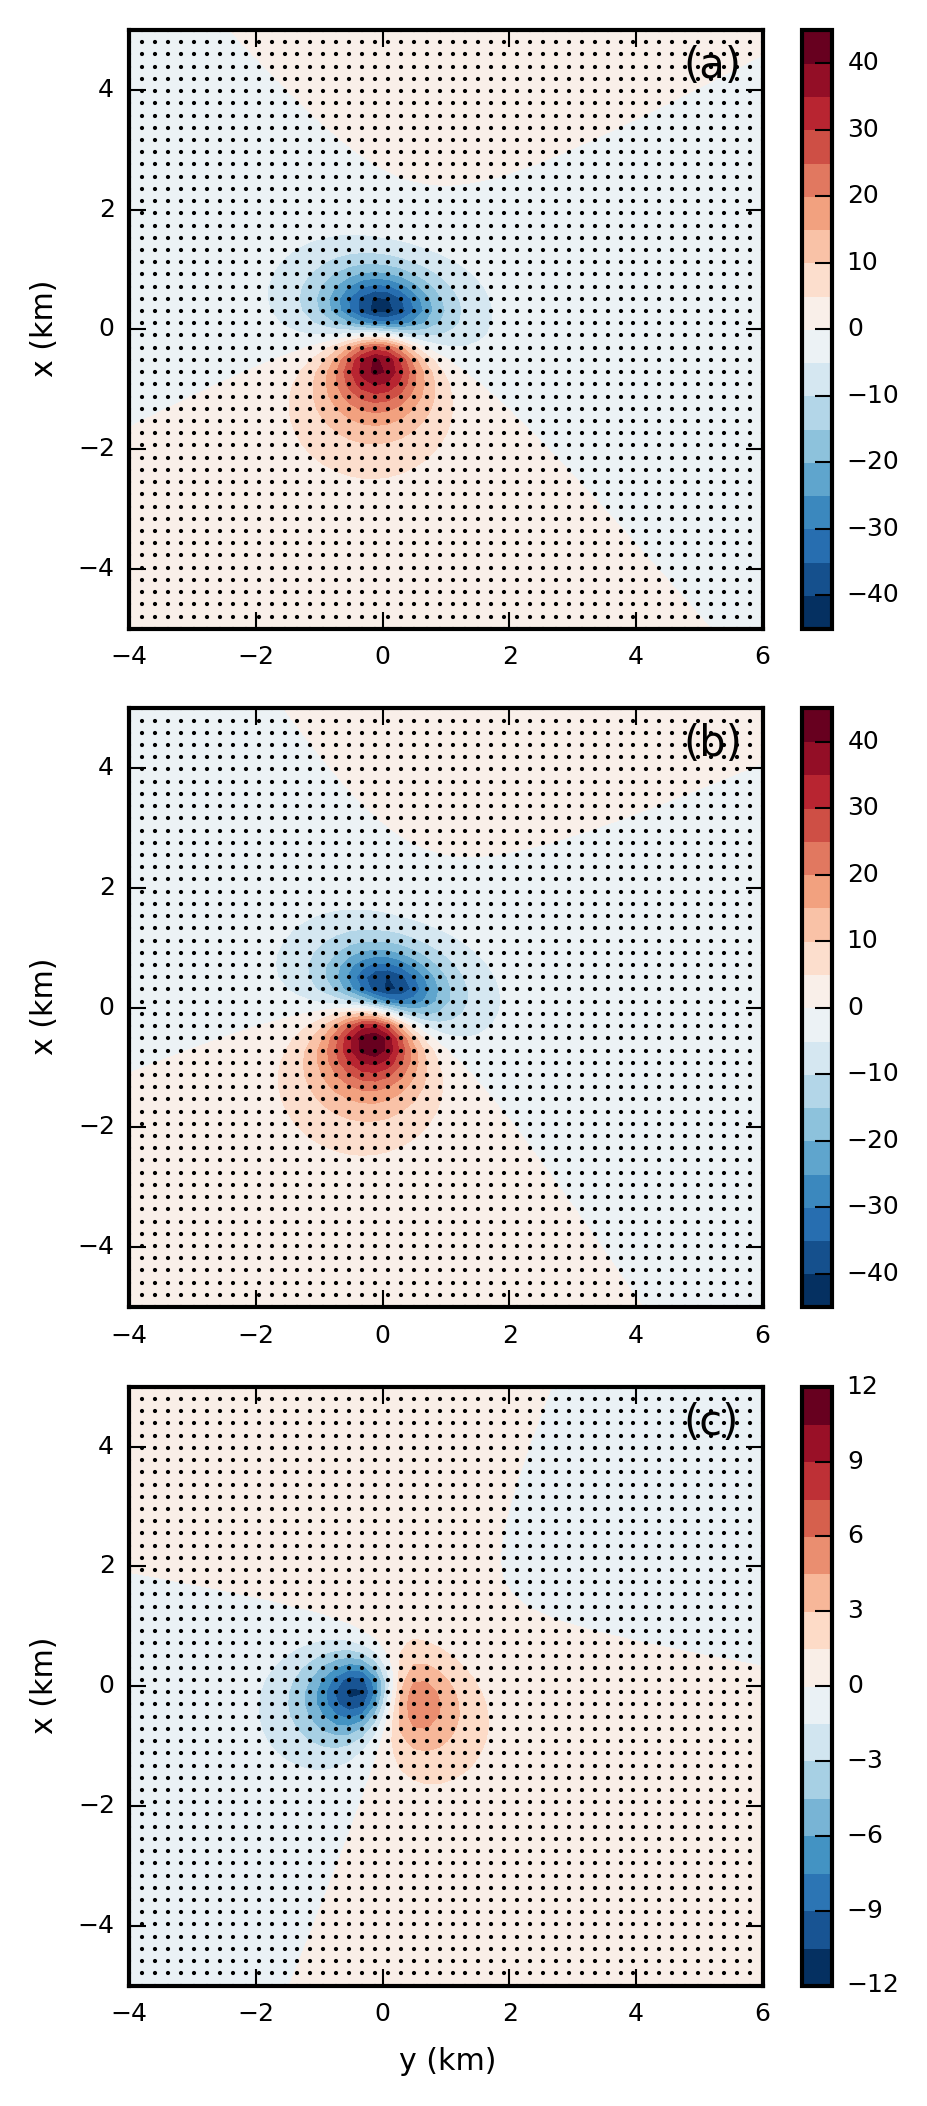

In [11]:
plt.figure(figsize=(3.15, 7))
plt.axis('scaled')

#ranges = np.max(np.abs([np.min(tf_t), np.max(tf_t),
#                        np.min(tf_s), np.max(tf_s)]))
ranges = np.max(np.abs([np.min(tf_t), np.max(tf_t)]))
levels = MaxNLocator(nbins=20).tick_values(-ranges, ranges)
cmap = plt.get_cmap('RdBu_r')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

plt.subplot(3,1,1)
plt.contourf(0.001*yp.reshape(shape), 0.001*xp.reshape(shape),
             tf_t.reshape(shape), levels=levels,
             cmap = cmap, norm=norm)
plt.plot(0.001*yp, 0.001*xp, '.k', markersize=1)
plt.ylabel('x (km)')
plt.xlim(0.001*np.min(yp), 0.001*np.max(yp))
plt.ylim(0.001*np.min(xp), 0.001*np.max(xp))
cbar = plt.colorbar()
plt.annotate(s='(a)', xy=(0.88,0.92),
             xycoords = 'axes fraction', color='k',
             fontsize = 10)

ranges = np.max(np.abs([np.min(tf_s), np.max(tf_s)]))
levels = MaxNLocator(nbins=20).tick_values(-ranges, ranges)
cmap = plt.get_cmap('RdBu_r')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

plt.subplot(3,1,2)
plt.contourf(0.001*yp.reshape(shape), 0.001*xp.reshape(shape),
             tf_s.reshape(shape), levels=levels,
             cmap = cmap, norm=norm)
plt.plot(0.001*yp, 0.001*xp, '.k', markersize=1)
plt.ylabel('x (km)')
plt.xlim(0.001*np.min(yp), 0.001*np.max(yp))
plt.ylim(0.001*np.min(xp), 0.001*np.max(xp))
plt.colorbar()
plt.annotate(s='(b)', xy=(0.88,0.92),
             xycoords = 'axes fraction', color='k',
             fontsize = 10)

ranges = np.max(np.abs([np.min(tf_r), np.max(tf_r)]))
levels = MaxNLocator(nbins=20).tick_values(-ranges, ranges)
cmap = plt.get_cmap('RdBu_r')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

plt.subplot(3,1,3)
plt.contourf(0.001*yp.reshape(shape), 0.001*xp.reshape(shape),
             tf_r.reshape(shape), levels=levels,
             cmap = cmap, norm=norm)
plt.plot(0.001*yp, 0.001*xp, '.k', markersize=1)
plt.ylabel('x (km)')
plt.xlabel('y (km)')
plt.xlim(0.001*np.min(yp), 0.001*np.max(yp))
plt.ylim(0.001*np.min(xp), 0.001*np.max(xp))
plt.colorbar()
plt.annotate(s='(c)', xy=(0.88,0.92), 
             xycoords = 'axes fraction', color='k',
             fontsize = 10)

plt.tight_layout()

plt.show()

##### Field components

In [12]:
# field components produced by the ellipsoid (in nT)
bx_t = triaxial_ellipsoid.bx(xp, yp, zp, [ellipsoid],
                             F, inc, dec, demag=False)
by_t = triaxial_ellipsoid.by(xp, yp, zp, [ellipsoid],
                             F, inc, dec, demag=False)
bz_t = triaxial_ellipsoid.bz(xp, yp, zp, [ellipsoid],
                             F, inc, dec, demag=False)

bt = [bx_t, by_t, bz_t]

# field components produced by the sphere (in nT)
bx_s = sphere.bx(xp, yp, zp, [spherical_body])
by_s = sphere.by(xp, yp, zp, [spherical_body])
bz_s = sphere.bz(xp, yp, zp, [spherical_body])

bs = [bx_s, by_s, bz_s]

# residuals
bx_r = bx_t - bx_s
by_r = by_t - by_s
bz_r = bz_t - bz_s

br = [bx_r, by_r, bz_r]

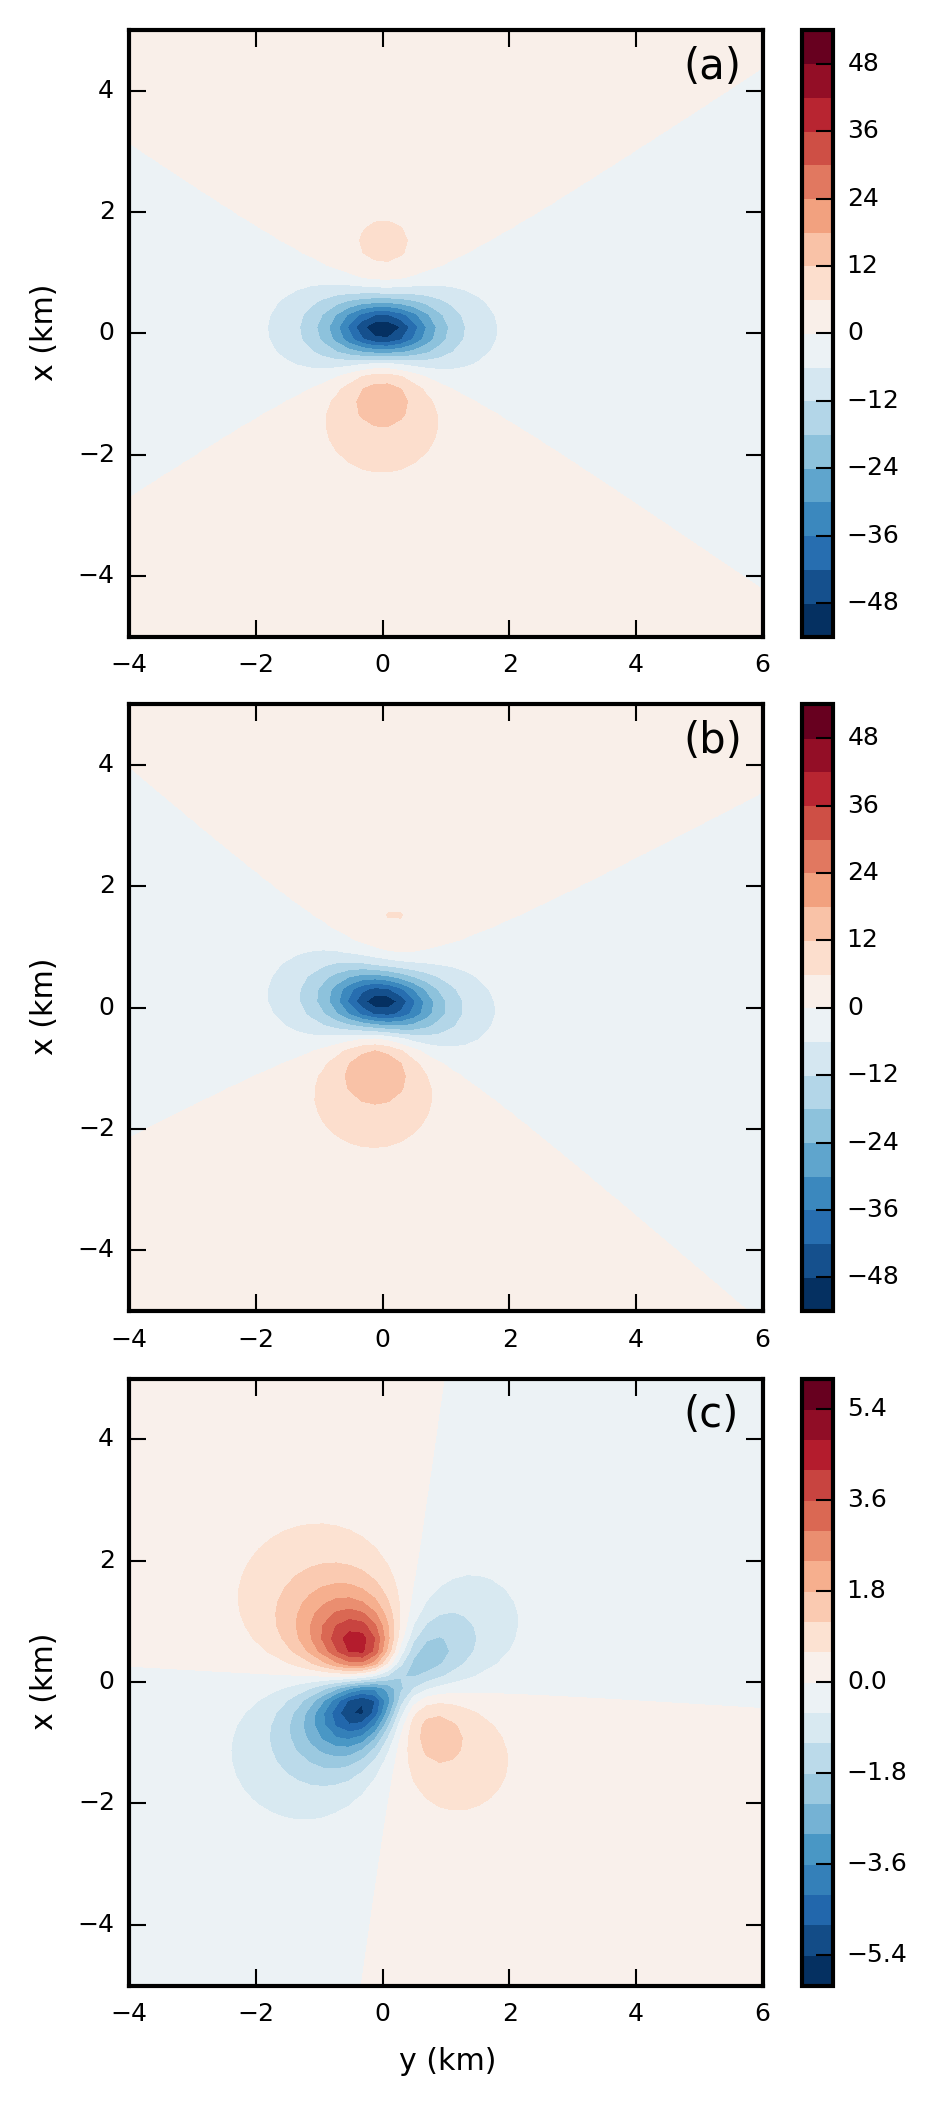

In [13]:
plt.figure(figsize=(3.15, 7))
plt.axis('scaled')

#ranges = np.max(np.abs([np.min(bx_t), np.max(bx_t),
#                        np.min(bx_s), np.max(bx_s)]))
ranges = np.max(np.abs([np.min(bx_t), np.max(bx_t)]))
levels = MaxNLocator(nbins=20).tick_values(-ranges, ranges)
cmap = plt.get_cmap('RdBu_r')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

plt.subplot(3,1,1)
plt.contourf(0.001*yp.reshape(shape), 0.001*xp.reshape(shape),
             bx_t.reshape(shape), levels=levels,
             cmap = cmap, norm=norm)
plt.ylabel('x (km)')
plt.xlim(0.001*np.min(yp), 0.001*np.max(yp))
plt.ylim(0.001*np.min(xp), 0.001*np.max(xp))
cbar = plt.colorbar()
plt.annotate(s='(a)', xy=(0.88,0.92),
             xycoords = 'axes fraction', color='k',
             fontsize = 10)

ranges = np.max(np.abs([np.min(bx_s), np.max(bx_s)]))
levels = MaxNLocator(nbins=20).tick_values(-ranges, ranges)
cmap = plt.get_cmap('RdBu_r')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

plt.subplot(3,1,2)
plt.contourf(0.001*yp.reshape(shape), 0.001*xp.reshape(shape),
             bx_s.reshape(shape), levels=levels,
             cmap = cmap, norm=norm)
plt.ylabel('x (km)')
plt.xlim(0.001*np.min(yp), 0.001*np.max(yp))
plt.ylim(0.001*np.min(xp), 0.001*np.max(xp))
plt.colorbar()
plt.annotate(s='(b)', xy=(0.88,0.92),
             xycoords = 'axes fraction', color='k',
             fontsize = 10)

ranges = np.max(np.abs([np.min(bx_r), np.max(bx_r)]))
levels = MaxNLocator(nbins=20).tick_values(-ranges, ranges)
cmap = plt.get_cmap('RdBu_r')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

plt.subplot(3,1,3)
plt.contourf(0.001*yp.reshape(shape), 0.001*xp.reshape(shape),
             bx_r.reshape(shape), levels=levels,
             cmap = cmap, norm=norm)
plt.ylabel('x (km)')
plt.xlabel('y (km)')
plt.xlim(0.001*np.min(yp), 0.001*np.max(yp))
plt.ylim(0.001*np.min(xp), 0.001*np.max(xp))
plt.colorbar()
plt.annotate(s='(c)', xy=(0.88,0.92), 
             xycoords = 'axes fraction', color='k',
             fontsize = 10)

plt.tight_layout()

plt.show()

In [14]:
ççççççççççç

SyntaxError: invalid syntax (<ipython-input-14-a1e3cb40c837>, line 1)

In [ ]:
plt.figure(figsize=(3.15, 7))
plt.axis('scaled')

#ranges = np.max(np.abs([np.min(by_t), np.max(by_t),
#                        np.min(by_s), np.max(by_s)]))
ranges = np.max(np.abs([np.min(by_t), np.max(by_t)]))
levels = MaxNLocator(nbins=20).tick_values(-ranges, ranges)
cmap = plt.get_cmap('RdBu_r')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

plt.subplot(3,1,1)
plt.contourf(0.001*yp.reshape(shape), 0.001*xp.reshape(shape),
             by_t.reshape(shape), levels=levels,
             cmap = cmap, norm=norm)
plt.ylabel('x (km)')
plt.xlim(0.001*np.min(yp), 0.001*np.max(yp))
plt.ylim(0.001*np.min(xp), 0.001*np.max(xp))
cbar = plt.colorbar()
plt.annotate(s='(a)', xy=(0.88,0.92),
             xycoords = 'axes fraction', color='k',
             fontsize = 10)

ranges = np.max(np.abs([np.min(by_s), np.max(by_s)]))
levels = MaxNLocator(nbins=20).tick_values(-ranges, ranges)
cmap = plt.get_cmap('RdBu_r')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

plt.subplot(3,1,2)
plt.contourf(0.001*yp.reshape(shape), 0.001*xp.reshape(shape),
             by_s.reshape(shape), levels=levels,
             cmap = cmap, norm=norm)
plt.ylabel('x (km)')
plt.xlim(0.001*np.min(yp), 0.001*np.max(yp))
plt.ylim(0.001*np.min(xp), 0.001*np.max(xp))
plt.colorbar()
plt.annotate(s='(b)', xy=(0.88,0.92),
             xycoords = 'axes fraction', color='k',
             fontsize = 10)

ranges = np.max(np.abs([np.min(by_r), np.max(by_r)]))
levels = MaxNLocator(nbins=20).tick_values(-ranges, ranges)
cmap = plt.get_cmap('RdBu_r')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

plt.subplot(3,1,3)
plt.contourf(0.001*yp.reshape(shape), 0.001*xp.reshape(shape),
             by_r.reshape(shape), levels=levels,
             cmap = cmap, norm=norm)
plt.ylabel('x (km)')
plt.xlabel('y (km)')
plt.xlim(0.001*np.min(yp), 0.001*np.max(yp))
plt.ylim(0.001*np.min(xp), 0.001*np.max(xp))
plt.colorbar()
plt.annotate(s='(c)', xy=(0.88,0.92), 
             xycoords = 'axes fraction', color='k',
             fontsize = 10)

plt.tight_layout()

plt.show()

In [ ]:
plt.figure(figsize=(3.15, 7))
plt.axis('scaled')

#ranges = np.max(np.abs([np.min(bz_t), np.max(bz_t),
#                        np.min(bz_s), np.max(bz_s)]))
ranges = np.max(np.abs([np.min(bz_t), np.max(bz_t)]))
levels = MaxNLocator(nbins=20).tick_values(-ranges, ranges)
cmap = plt.get_cmap('RdBu_r')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

plt.subplot(3,1,1)
plt.contourf(0.001*yp.reshape(shape), 0.001*xp.reshape(shape),
             bz_t.reshape(shape), levels=levels,
             cmap = cmap, norm=norm)
plt.ylabel('x (km)')
plt.xlim(0.001*np.min(yp), 0.001*np.max(yp))
plt.ylim(0.001*np.min(xp), 0.001*np.max(xp))
cbar = plt.colorbar()
plt.annotate(s='(a)', xy=(0.88,0.92),
             xycoords = 'axes fraction', color='k',
             fontsize = 10)

ranges = np.max(np.abs([np.min(bz_s), np.max(bz_s)]))
levels = MaxNLocator(nbins=20).tick_values(-ranges, ranges)
cmap = plt.get_cmap('RdBu_r')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

plt.subplot(3,1,2)
plt.contourf(0.001*yp.reshape(shape), 0.001*xp.reshape(shape),
             bz_s.reshape(shape), levels=levels,
             cmap = cmap, norm=norm)
plt.ylabel('x (km)')
plt.xlim(0.001*np.min(yp), 0.001*np.max(yp))
plt.ylim(0.001*np.min(xp), 0.001*np.max(xp))
plt.colorbar()
plt.annotate(s='(b)', xy=(0.88,0.92),
             xycoords = 'axes fraction', color='k',
             fontsize = 10)

ranges = np.max(np.abs([np.min(bz_r), np.max(bz_r)]))
levels = MaxNLocator(nbins=20).tick_values(-ranges, ranges)
cmap = plt.get_cmap('RdBu_r')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

plt.subplot(3,1,3)
plt.contourf(0.001*yp.reshape(shape), 0.001*xp.reshape(shape),
             bz_r.reshape(shape), levels=levels,
             cmap = cmap, norm=norm)
plt.ylabel('x (km)')
plt.xlabel('y (km)')
plt.xlim(0.001*np.min(yp), 0.001*np.max(yp))
plt.ylim(0.001*np.min(xp), 0.001*np.max(xp))
plt.colorbar()
plt.annotate(s='(c)', xy=(0.88,0.92), 
             xycoords = 'axes fraction', color='k',
             fontsize = 10)

plt.tight_layout()

plt.show()